准备工作
首先，要明白是六个人（亲戚吧），他们本来分散在美国的全国各地，然后呢？他们约好了某一天，一起到纽约旅游，本地约定一天往返，他们就旅游这么一天。所以，我们可以写出如下:

In [7]:
import time
import random
import math

people = [('Seymour','BOS'),
          ('Franny','DAL'),
          ('Zooey','CAK'),
          ('Walt','MIA'),
          ('Buddy','ORD'),
          ('Les','OMA')]
# Laguardia
destination='LGA'

'BOS'

 从他们所在地到纽约是乘坐飞机，但是飞机有不同的航班，航班的价格也不一样。书中为我们准备了一份航班列表：schedule.txt，供我们使用，我节选其中一部分进行讲解,如下所示

LGA,OMA,18:25,20:34,205
OMA,LGA,18:12,20:17,242
他们用逗号分隔，依次是始发地、目的地、飞行时间、到达时间和价格。由于之前我们已经说了，这个旅游就是一天的时间的，一天之内往返，所以航班信息只有时间，没有日期。

我们必然会在代码中会使用这些航班信息，因为我们要针对每一个人，选出一对航班，让他从当前位置飞到纽约，再从纽约飞回他的家。所以，先让我们把这份文件读进代码，我们决定放在一个字典内，再次强调，字典就是键值对。
其中setdefault的函数，比较难理解，可以参考这里
代码如下：


In [2]:
flights = {}
for line in open('schedule.txt'):
    origin,dest,depart,arrive,price = line.strip().split(',')
    flights.setdefault((origin,dest),[])
     #其中setdefault是作为字典类的一个方法，主要的作用是应对一种情况：当一个键对应多个值,每一个值是一个元组，多个元祖组成一个列表，  
    #说白了，一个键对应一个列表，列表内有许多的元祖，一个元祖代表一个航班信息  
    #setdefault的含义是："如果没有，就设置"，如果有，就添加。 
    #现在我们一行一行的把航班信息加入进去  
    #我认为，我们是对一个列表作为值，所以最外面是一个[]  
    #里面跟了一个元祖，这个元祖就是键  
    flights[(origin,dest)].append((depart,arrive,int(price)))
    

In [63]:
flights

{('BOS', 'LGA'): [('6:17', '8:26', 89),
  ('8:04', '10:11', 95),
  ('9:45', '11:50', 172),
  ('11:16', '13:29', 83),
  ('12:34', '15:02', 109),
  ('13:40', '15:37', 138),
  ('15:27', '17:18', 151),
  ('17:11', '18:30', 108),
  ('18:34', '19:36', 136),
  ('20:17', '22:22', 102)],
 ('CAK', 'LGA'): [('6:08', '8:06', 224),
  ('8:27', '10:45', 139),
  ('9:15', '12:14', 247),
  ('10:53', '13:36', 189),
  ('12:08', '14:59', 149),
  ('13:40', '15:38', 137),
  ('15:23', '17:25', 232),
  ('17:08', '19:08', 262),
  ('18:35', '20:28', 204),
  ('20:30', '23:11', 114)],
 ('DAL', 'LGA'): [('6:12', '10:22', 230),
  ('7:53', '11:37', 433),
  ('9:08', '12:12', 364),
  ('10:30', '14:57', 290),
  ('12:19', '15:25', 342),
  ('13:54', '18:02', 294),
  ('15:44', '18:55', 382),
  ('16:52', '20:48', 448),
  ('18:26', '21:29', 464),
  ('20:07', '23:27', 473)],
 ('LGA', 'BOS'): [('6:39', '8:09', 86),
  ('8:23', '10:28', 149),
  ('9:58', '11:18', 130),
  ('10:33', '12:03', 74),
  ('12:08', '14:05', 142),
  ('13:3

此时，我们需要加入一个函数，函数是将几点几分，转换为从凌晨0点开始经过了多少分钟，需要这个函数的原因：几点几分的比较非常不便，而单纯的分钟数，使得飞机的飞行时间、候机时间变得容易计算。

代码：

In [4]:
def getminutes(t):
    x = time.strptime(t,'%H:%M')
    return x[3]*60 + x[4]
 #我觉得x[0]x[1]x[2]是年月日  

 下面我们要规定一种方式，用这种方式用来简单的表达某一个人选择了哪两个航班。实际上这就是我们的解，我们求的最优解，就是用这种方式来表达。从书中读到，我们要注意对类似的问题、类似的解做到通用，显然这个思维非常重要，但是目前对我来说，缺少太多实践经验，所以不容易。在题本中，我们用一组数组数列来表示，数组在Python里面叫做列表。如下所示:


[1,4,3,2,7,3,6,3,2,4,5,3]


我们有6个人，每人两个航班，所有上面一个有12个数字，依次的第一个人的起飞航班和返回航班，而1代表，这个人将会乘坐这天中从某地到纽约的第二趟航班，因为0代表了第一趟。为什么这种方式会便捷呢？因为在flights字典中，我们已经把起止点相同的航班合并为了一个列表，而列表当然可以用其下标0、1下表示。

显然，如果我们每次都这么读这一串数字是非常辛苦的，所以我们决定写一个函数，这个函数接受这一串数字列表，然后将人名、和起飞时间，起飞地点等信息都完整的打印出来。
代码：

def printSchedule(r):
    for d in range(len(r)/2):
        name = people[d][0]
        origin = people[d][1]
        out = flights[(origin,mdestination)][r[2*d]]
        ret = flights[(destination,origin)][r[2*d+1]]
        print('%10s%10s %5s-%5s $%3s %5s-%5s $%3s'
             %(name,origin,out[0],out[1],out[2] ,ret[0],ret[1],ret[2]))

In [28]:
s = [1,4,3,2,7,3,6,3,2,4,5,3]
#range(len(s)/2
#type(int(len(s)/2))
printSchedule(s)

TypeError: 'float' object cannot be interpreted as an integer

报错的原因是len(r)/2是浮点数

In [42]:

def printschedule(r):
    s = int(len(r)/2)
    for d in range(s):#针对每一个人打印两个航班信息，我们只用重复r的一半次  
        name=people[d][0]  
        origin= people[d][1]  
        out=flights[(origin,destination)][r[2*d]]  
        ret=flights[(destination,origin)][r[2*d+1]]  
        print ('%10s%10s %5s-%5s $%3s %5s-%5s $%3s' % (name,origin,out[0],out[1],out[2],ret[0],ret[1],ret[2]))  

In [43]:
s = [1,4,3,2,7,3,6,3,2,4,5,3]
#range(len(s)/2
type(int(len(s)/2))
#range(int(len(s)/2)）
printschedule(s)

   Seymour       BOS  8:04-10:11 $ 95 12:08-14:05 $142
    Franny       DAL 10:30-14:57 $290  9:49-13:51 $229
     Zooey       CAK 17:08-19:08 $262 10:32-13:16 $139
      Walt       MIA 15:34-18:11 $326 11:08-14:38 $262
     Buddy       ORD  9:42-11:32 $169 12:08-14:47 $231
       Les       OMA 13:37-15:08 $250 11:07-13:24 $171


成本函数

下面我们要做一个函数，叫做成本函数。顾名思义，就是我们做一件事的成本和代价。该函数有一个输入：就是航班信息，有一个输出，就是一个数字，数字越大代表代价越高。
书中提到：成本函数是用最优化算法的关键，这是因为它往往难以确定，到底哪些是成本，成本的大小有多少？通过这个例子我相信大家有着更深刻的体会。下面请一个一个看，有哪些成本和这些成本如何用金钱来度量。

    飞机的价格：6个人乘坐12次飞机的机票费用，显然我们希望价格越低越好。价格的金钱度量很直接。
    飞行时间：每个人在乘坐飞机时所花费的时间，我们当然希望乘坐飞机的时间越短越好。每分钟1美元。（代码中忽略了）
    等待时间：在机场等待其他成员到达的时间，当然我们希望这个时间越短越好。每分钟1美元。
    出发时间：早晨太早的飞机将会产生额外的成本，该成本就是要求旅游的人减少睡眠时间。我们希望尽可能的不要早，要合适。所以这个数字应该是越晚越好。（代码中忽略了）
    汽车租用时间：集体租用一辆车，那么因为只旅游一天而已，所以租车的时间最好要控制在二十四小时之内。超过之后会产生额外的成本。超过二十四小时则产生50美元的罚款。


上述这是书中作者找到的关键的成本因素和金额度量。我们按照自己觉得合理的方式随意改动。

代码如下：

In [48]:
def schedulecost(sol):
    totalprice = 0
    latestarrival = 0
    earliestdep = 24*60
    
    s = int(len(sol)/2)
    for d in range(s):
        origin = people[d][1]
        outbound = flights[(origin,destination)][int(sol[2*d])]
        returnf = flights[(destination,origin)][int(sol[2*d+1])]
        
        #把钱加入到总价格里面去 
        totalprice += outbound[2]
        totalprice += returnf[2]
        
        #根据实际情况改变最晚到达时间和最早离开时间 
        if latestarrival < getminutes(outbound[1]): latestarrival= getminutes(outbound[1])
        if earliestdep > getminutes(returnf[0]): earliestdep = getminutes(returnf[0])
            
    #每一个人必须在机场等待直到最后一个来了才能出发  
    #每一个人必须在旅游结束时，为了最早离开的人能够赶上飞机，而来到机场等候
    totalwait = 0
    for d in range(s):
        origin = people[d][1]
        outbound = flights[(origin,destination)][int(sol[2*d])]
        returnf = flights[(destination,origin)][int(sol[2*d+1])]
        
        totalwait += latestarrival- getminutes(outbound[1])
        totalwait += getminutes(returnf[0])-earliestdep
        
    #如果这样看，在机场每多等一分钟就是1美元，而租车如果超过24个小时就罚款50美元
    if latestarrival<earliestdep: totalprice += 50
        
    return totalprice+totalwait
        
            
            

In [49]:
schedulecost(s)

4585

随机搜索

所以我们需要求最优解。在正在开始学习最优化算法之前，让我们先来学一个叫随机搜索的东西。
随机搜索不是最优化算法，但是我们用它来评估其他算法的优劣。实际上，他就是随机产生结果。但是我们可以重复随机产生一堆结果...用来干什么我就不知道了。下面我们直接看代码吧，关键的部分我会在相应出解释。


In [52]:
def randomoptimize(domain,costf):
    best = 99999
    bestr = None
    #我们打算随机产生1000次结果，从这1000次结果中选择一个最好的 
    for i in range(1000):
        #创建一个解
        r = [random.randint(domain[i][0],domain[i][1]) for i in range(len(domain))]
        #domain代表随机产生的数字的个数和每一个数字的范围，是一个列表，列表里每个元素里面是一个元组，每个元组有2个元素，一个是上限，一个是下限
        cost = costf(r)        
        #costf就是成本函数，  
        #每次随机产生一组结果的时候，我们将会使用costf进行一下测试，看看效果如何
        if cost<best:
            best = cost
            bestr = r
    return r

In [50]:
domain = [(0,9)]*(len(people)*2)
domain

[(0, 9),
 (0, 9),
 (0, 9),
 (0, 9),
 (0, 9),
 (0, 9),
 (0, 9),
 (0, 9),
 (0, 9),
 (0, 9),
 (0, 9),
 (0, 9)]

In [51]:
r=[random.randint(domain[0][0],domain[0][1]) for i in range(len(domain))]
r

[6, 9, 9, 9, 3, 4, 5, 1, 9, 2, 1, 0]

In [62]:
s = randomoptimize(domain,schedulecost)
schedulecost(s)

5740

## 爬山法


核心思维

通过随机搜索我们可以发现，每次寻找的解都是跳跃性的，前一个寻找的解和后一个寻找的解没有任何联系。所以在寻找最优解的过程中，效率不过，我们现在的想法是：让每一个解都对寻找最优解提供一点点帮助。爬山法的核心思维是：从一个随机解开始，然后在其临近的解集中寻找更好地题解，在本题中，就是更低的成本。核心思维有了，但是如何拿到临近解确实一个问题，或者说，如何设置临近解的产生，更加确切，在本题中，我们针对一个解，其中的每一个数字都加一或者减一，这样我们就能使得某一个人坐的飞机能够稍早一些或者稍晚一些。之所以加一或减一能够决定一个人稍稍早一些或者晚一些，这是因为：

经过查看flights{}字典发现，原来每一个键都是按照时间顺序排列的


如下所示，我记得我的代码并没有刻意为之排序，看样子是默认排序的。

In [69]:
def hillclimb(domain,costf):
    sol = [random.randint(domain[i][0],domain[i][1]) for i in range(len(domain))]
    
    #主循环
    #持续一个循环，直到在一次对每一个解减一或者加一之后没有任何改变时，就break  
    while 1:
        #相邻街列表
        neighbors = []
        for j in range(len(domain)):
            #解中的每一个元素都都会加一或者减一，加一产生一个解集，减一产生一个解集  
            if sol[j] > domain[j][0]:
                neighbors.append(sol[0:j] + [sol[j]-1] + sol[j+1:])
            if sol[j] < domain[j][1]:
                neighbors.append(sol[0:j] + [sol[j]+1] + sol[j+1:])
            
        #neighbors已经组装好了，现在在里面找最优解
        current = costf(sol)
        best = current
        for j in range(len(neighbors)):
            cost = costf(neighbors[j])
            if cost < best:
                best = cost
                sol = neighbors[j]
        #如果没有最好的解了，则退出循环
        if best == current:
            break
    return sol
                           

In [66]:
sol = [random.randint(domain[i][0],domain[i][1]) for i in range(len(domain))]
sol

[0, 4, 9, 7, 1, 1, 0, 0, 3, 7, 8, 8]

neibor = sol[0:j] +[sol[j]-1]+sol[j+1:] 我做了个测试，看测试的还很清楚就能明白这个什么东西，加三个列表加起来

In [67]:

j= 2
neibor = sol[0:j] +[sol[j]-1]+sol[j+1:]
neibor

[0, 4, 8, 7, 1, 1, 0, 0, 3, 7, 8, 8]

看看与随机搜索法比较，其效果如何

In [70]:
s = hillclimb(domain,schedulecost)
schedulecost(s)

3235

效果不是一般的好。下面谈一下爬山法的缺点。我认为书本上的一幅图，非常好体现了爬山法缺点。简单来讲，爬山法只能找到局部最优解，不能找到全局最优解，而我们要找的当然就是全局最优解。当然我们可以重复使用爬山法，都使用不同的初始状态。  
可以用模拟退火法和遗传算法解决局部最小的问题

## 模拟退火算法


原理

受物理领域的一个启发。说白了很简单，根据刚刚所说的爬山法，我们很容易陷入局部最优解，这是因为每次我们都只允许成本小的存在（成为当前最优解，接着进行下一个循环）。我们没有给算法一个跳出这个局部的机会，所以，我们这个模拟退火算法的关键就是：如果成更高，我们让其有可能成为当前的最优解。关键的关键就是在可能的程度上，我们要求：刚开始的时候可能大，随着时间的推移（在模拟退火算法中是温度的降低，当温度降低到某个时刻），可能性越来越小，也就是只接受成本更低的数列。这就有了跳出局部最优解的机会。
为什么刚开始的概率大呢？因为温度高，所以指数接近了0，所以概率几乎为1,随着温度的减少，高成本与低成本之间的差值将会越来越重要，差异越大，概率越低。这注定了：该算法只会接受稍稍高一点成本的解，而不会接受成本高出许许多多的解。  
概率公式为：
p=exp(-(highcost-lowcost)/temperature)

In [76]:
def annealingoptimize(domain,costf,T=10000.0,cool=0.95,step=1):
    #和爬山法一样，先产生一个随机解，然后一切的改变都从这个随机解开始  
    vec = [float(random.randint(domain[i][0],domain[i][1])) for i in range(len(domain))]
    
    while T > 0.1:
        #产生一个随机数，决定这次改变是改变数列中的哪一个随机数 
        i = random.randint(0,len(domain)-1)
        
        #选择一个改变的方向，也就是说是增加还是减少 
        dir = random.randint(-step,step)
        
        #复制前面的随机解，然后对随机解进行改变，然后判断到底新的解好，还是后来产生的解好 
        vecb = vec[:]
        vecb[i] += dir
        
        #这一段主要还是不让它超不过了最大最小值的限制
        if vecb[i] < domain[i][0]: vecb[i] = domain[i][0]
        elif vecb[i] > domain[i][1]: vecb[i] = domain[i][1]
            
        #计算新产生的两次解的成本，然后对成本进行比较
        ea = costf(vec)
        eb = costf(vecb)
        
        #or后面：表示接受更差的结果。仔细想想，原来概率的表示是如此完成的，注意前一个random()产生的数是在0到1之间。
        if (eb < ea or random.random() < pow(math.e,-(eb-ea)/T)):
            vec = vecb
            
        #降低温度
        #每经过一次循环，改变温度，温度一改变，就会改变循环的次数和接受更差解的概率  
        T = T*cool
    return vec
        

In [77]:
s=annealingoptimize(domain,schedulecost)
schedulecost(s)

3668

经过我的验证，确实可以产生更不错的低成本，另外，偶尔也会得到一个较高成本的结果，记住一定要使用不同的参数多试一试，初始温度，冷却率，step的值等等。

## 遗传算法


原理

遗传算法是受生物学启发而产生了的。该类算法首先产生一个组解，称之为种群，对应种群里面的每一个解，我们都会计算其成本，显然一组解，应了一组成本。我们将成本排序。

如下图

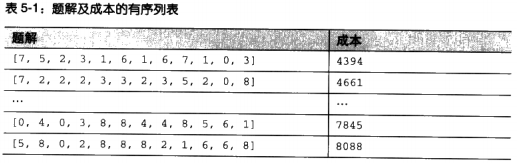

 依据这个排了序的结果，我们将会产生下一个子代。为了使下一个子代的成本更低，我们首先选出目前这一代的优良品种，由于排序，很容易选择前几名，我们可以也约定好，选择前多少名。


选了前几名之后，显然这一代的种群数量还不够，我们采用变异或者配对的方式来产生更多的子代，凑满种群的数量。

变异的做法就是指对一个解里面某一个小部分进行小的改变，如下图所示。6改为5,0改成1，当然这肯定是有实际含义的对吧。

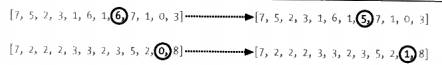

 配对又称交叉，我们将两个优良品种各取一部分，组成一个新的解。当然，实际上，要根据实际情况的不同而进行调整。如下图所示：

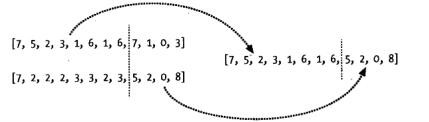

然后我们凑够了下一代种群，之后又排序，重复上述过程，每一重复一次，我们为迭代一次，迭代的次数可以自己选定。
具体代码如下：

In [115]:
 #popsize：一个种群的规模大小    
#elite：在当前种群中被认为优秀的子代的比例，优秀的子代可以直接传入下一代  
#maxiter：迭代运行多少代  
def geneticoptimize(domain,costf,popsize = 50,step = 1,mutprob = 0.2,elite = 0.2,maxiter = 100):
    
    #方法中还在定义方法  
    #变异操作  
    def mutate(vec):
        i = random.randint(0,len(domain)-1)
        #完成增加或减少的概率各一半
        if random.random() < 0.5 and vec[i] > domain[i][0]:
            return vec[0:i] + [vec[i]-step] + vec[i+1:]
        elif vec[i] < domain[i][1]:
            return vec[0:i] + [vec[i]+step] + vec[i+1:]
        
    #交叉操作
    def crossover(r1,r2):
        #为什么减2，其实想把这个一个数字列表划分为两段，再各取一半
        i = random.randint(1,len(domain) - 2)
        return r1[0:i]+r2[i:]
    
     #构造初始种群 
    pop = []
    for i in range(popsize):
        vec = [random.randint(domain[i][0],domain[i][1]) for i in range(len(domain))]
        pop.append(vec)
        
    #每一代有多少优势物种，我们需要保留
    topelite = int(elite*popsize)
    
    #主循环
    for i in range(maxiter):
        
        #列表里面，每一个元素都是一个元组，每一个元组是由一个数字和一个列表构成 
        scores = [(costf(v),v) for v in pop if v != None] #避免None值
        scores.sort()
        ranked = [v for (s,v) in scores] #这个操作没搞懂，后面单独输出看看
        
        ##从中选择我们觉得优势的物种，然后保留  
        pop = ranked[0:topelite]
        
        #如果种群数量不够，那么我们使用变异或者配对，产生新的后代个体
        while len(pop) < popsize:
            #mutprob：种群中进行变异，而不进行配对的概率。
            if random.random() < mutprob:
                c = random.randint(0,topelite)
                #注意是从优秀的子代中选出一个进行变异
                
                pop.append(mutate(ranked[c]))
                
            else:
                #交叉
                c1 = random.randint(0,topelite)
                c2 = random.randint(0,topelite)
                pop.append(crossover(ranked[c1],ranked[c2]))
                
        #print( scores[0][0])
    return scores[0][1]

In [107]:
pop = []
for i in range(50):
    vec = [random.randint(domain[i][0],domain[i][1]) for i in range(len(domain))]
    pop.append(vec)
scores = [(schedulecost(v),v) for v in pop]
scores.sort()
ranked = [v for (s,v) in scores]

In [108]:
scores[0]

(4675, [5, 3, 3, 5, 8, 2, 6, 5, 8, 3, 8, 5])

In [109]:
ranked[0]

[5, 3, 3, 5, 8, 2, 6, 5, 8, 3, 8, 5]

通过对比上面两行输出可以看出，ranked = [v for (s,v) in scores]操作是为了将参数列表单独提出

In [116]:
s = geneticoptimize(domain,schedulecost)
s

[7, 3, 5, 3, 7, 3, 6, 4, 6, 3, 7, 3]

In [111]:
printschedule(s)

   Seymour       BOS 12:34-15:02 $109 12:08-14:05 $142
    Franny       DAL 10:30-14:57 $290 17:14-20:59 $277
     Zooey       CAK 12:08-14:59 $149 13:37-15:33 $142
      Walt       MIA 11:28-14:40 $248 15:23-18:49 $150
     Buddy       ORD 12:44-14:17 $134 12:08-14:47 $231
       Les       OMA 12:18-14:56 $172 12:31-14:02 $234


总结   

到了这里算是一个阶段性结束。我们主要对一个模型抽象出了数字列表，然后对随机搜索、模拟退火算法、遗传算法进行了初步的理解和实现。我们发现在这里一系列问题中最困难的一步就是能否把问题潜在的解转化为数字列表。然后我个人觉得将整个问题转换为数字列表，或者能够运用编程的方式来解决就是很困难的。


此外，上述的求最优解的方法能发挥的功效呢？和问题本身有着密切的联系。上述求最优解的方法都依赖于一个事实：最优解应该接近去其他优解。然而，显示中可能存在这里的问题，如下图所示：

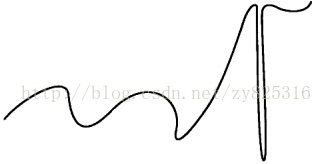

可以看出最优解的左右两边是否得陡峭，当产生了接近于最优解的解，我会认为其不是优解而排除，最后我们只能陷入了局部最优解之中，上图的左方。


如果放在航班例子中来看，就是我们如果从当天的第二次航班转到第三次航班时，比将其转到第八次航班更有可能降低成本。这是因为航班有序排列，对每一个解集的一个航班加一或者减一效果肯定比减5、加6来的效果好。但是如果航班处于无序状态，我们的求最优解的方式则不会有太大的作用，还不如随机搜索。其中的航班处于无序状态。什么意思？起飞的航班必须有序呀。

